**Problem Statement**
- Cardiovascular diseases are the leading cause of death globally. It is therefore  necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health

**Data Description**
- Age: Age in years
- Sex: 1 = male; 0 = female
- cp: Chest pain type
- trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
- chol: Serum cholesterol in mg/dl
- fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- restecg: Resting electrocardiographic results
- thalach: Maximum heart rate achieved
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: Slope of the peak exercise ST segment
- ca: Number of major vessels (0-3) colored by fluoroscopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
- Target: 1 or 0

In [1]:
#Import the necessary library.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from ydata_profiling import ProfileReport

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('1645792390_cep1_dataset.xlsx')
print(df.shape)
df.sample(7)

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3,1
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1


In [3]:
#EDA report of the features in the dataset.
profile = ProfileReport(df, title = 'Profile report')
profile.to_file(output_file = 'EDA.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Task to be performed:**
   1. Preliminary analysis:
   - Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.
   - Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

In [4]:
#Shape of the data.
print(df.shape)

(303, 14)


In [5]:
#Check the missing value in each column.
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#Check duplicate values in each column.
df.duplicated().sum()

1

In [7]:
#Removing dulicate value.
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

**Task to be performed:**
   2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:
   
       a. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data.
       
       b. Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 
       
       c. Study the occurrence of CVD across the Age category
       
       d. Study the composition of all patients with respect to the Sex category
       
       e. Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient
       
       f. Describe the relationship between cholesterol levels and a target variable
       
       g. State what relationship exists between peak exercising and the occurrence of a heart attack.
       
       h. Check if thalassemia is a major cause of CVD
       
       i. List how the other factors determine the occurrence of CVD
       
       j. Use a pair plot to understand the relationship between all the given variables

In [8]:
#2.a. Statistics of the data.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
#Data Information.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [10]:
#2.b List of categorical variables.
columns_cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[columns_cat]

,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2
...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3
299,1,3,0,1,0,1,0,3
300,1,0,1,1,0,1,2,3
301,1,0,0,1,1,1,1,3


1    206
0     96
Name: sex, dtype: int64


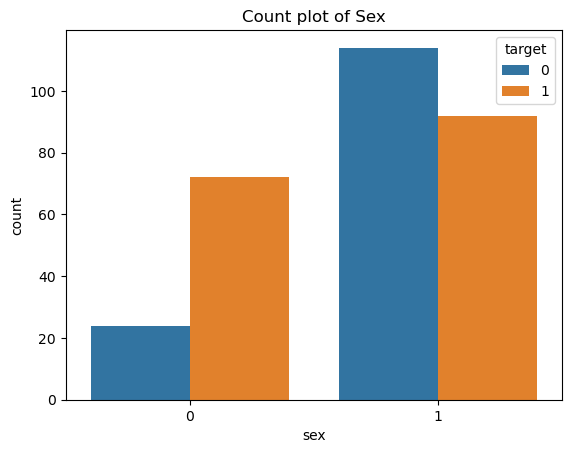

In [11]:
#Count plot of Sex.
print(df['sex'].value_counts())
sns.countplot(data = df, x = 'sex', hue = 'target')
plt.title('Count plot of Sex')
plt.show()

In [12]:
print(df[df['target'] == 1]['sex'].value_counts())
print(df[df['target'] == 0]['sex'].value_counts())

1    92
0    72
Name: sex, dtype: int64
1    114
0     24
Name: sex, dtype: int64


0    143
2     86
1     50
3     23
Name: cp, dtype: int64


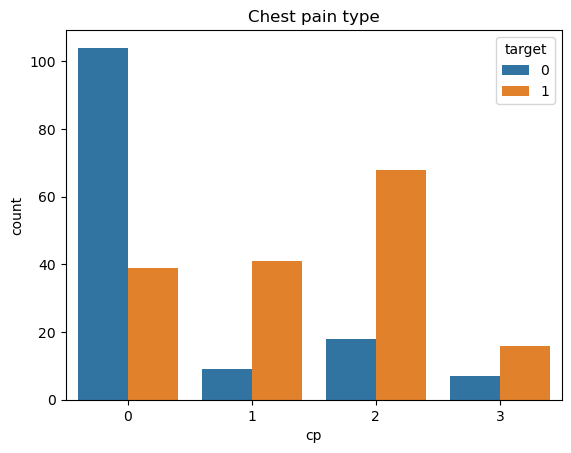

In [13]:
#Count plot of Chest pain type.
print(df['cp'].value_counts())
sns.countplot(data = df, x = 'cp', hue = 'target')
plt.title('Chest pain type')
plt.show()

0    257
1     45
Name: fbs, dtype: int64


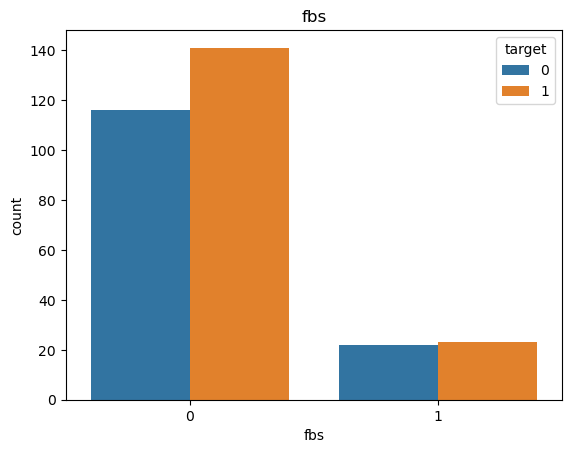

In [14]:
#Count plot of fbs.
print(df['fbs'].value_counts())
sns.countplot(data = df, x = 'fbs', hue = 'target')
plt.title('fbs')
plt.show()

1    151
0    147
2      4
Name: restecg, dtype: int64


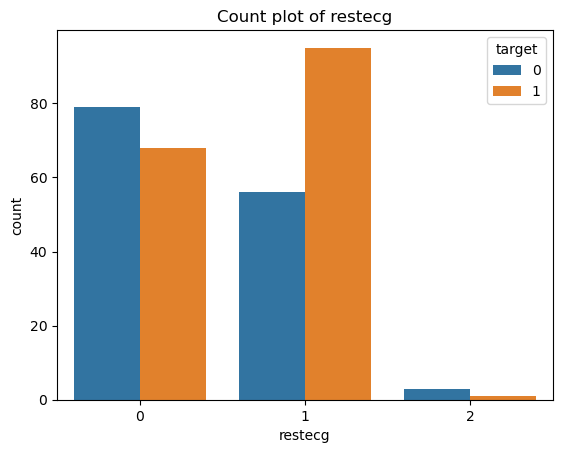

In [15]:
#Count plot of restecg.
print(df['restecg'].value_counts())
sns.countplot(data = df, x = 'restecg', hue = 'target')
plt.title('Count plot of restecg')
plt.show()

0    203
1     99
Name: exang, dtype: int64


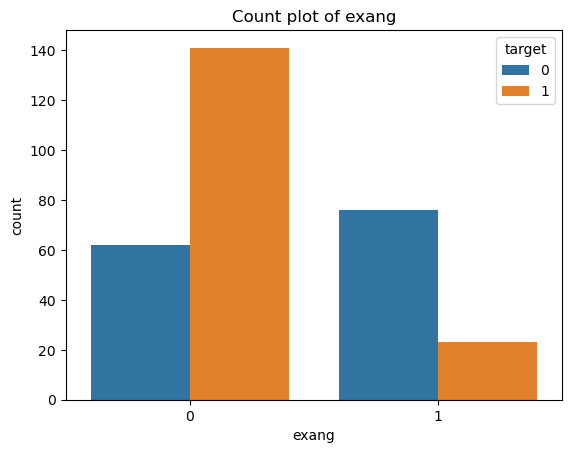

In [16]:
#Count plot of restecg.
print(df['exang'].value_counts())
sns.countplot(data = df, x = 'exang', hue = 'target')
plt.title('Count plot of exang')
plt.show()

2    141
1    140
0     21
Name: slope, dtype: int64


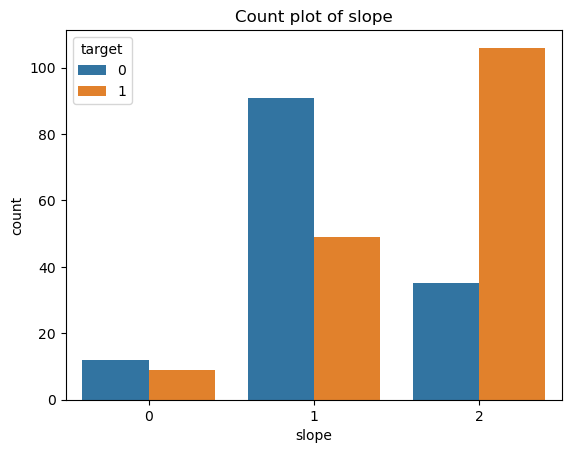

In [17]:
#Count plot of slope.
print(df['slope'].value_counts())
sns.countplot(data = df, x = 'slope', hue = 'target')
plt.title('Count plot of slope')
plt.show()

0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64


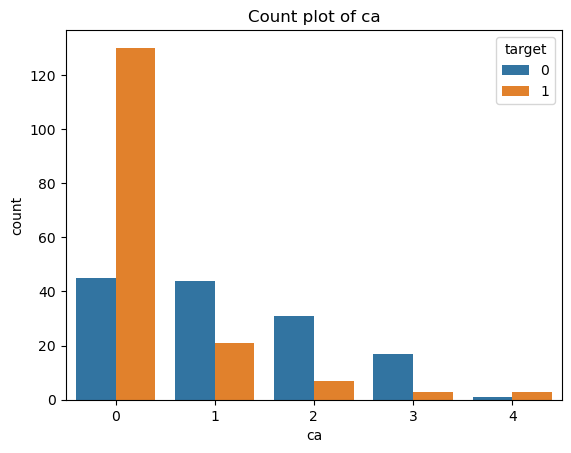

In [18]:
#Count plot of ca.
print(df['ca'].value_counts())
sns.countplot(data = df, x = 'ca', hue = 'target')
plt.title('Count plot of ca')
plt.show()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64


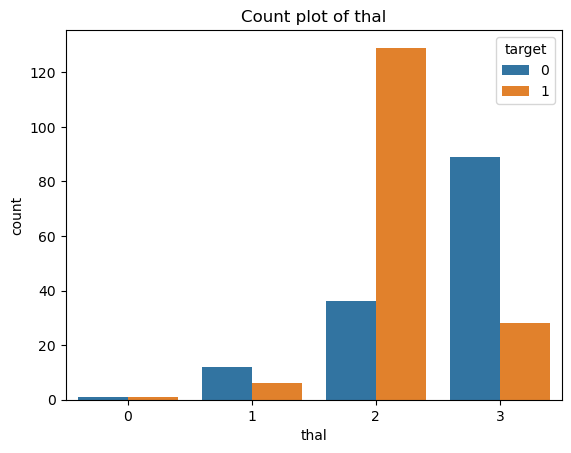

In [19]:
#Count plot of thal.
print(df['thal'].value_counts())
sns.countplot(data = df, x = 'thal', hue = 'target')
plt.title('Count plot of thal')
plt.show()

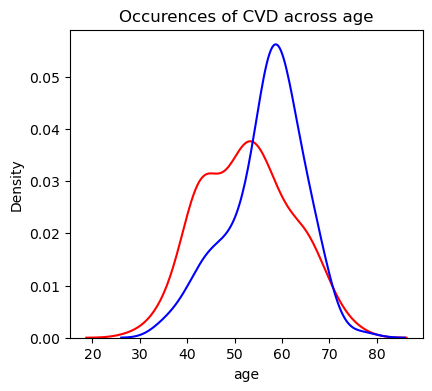

In [20]:
#2.c.
#Probability distribution of Occurences of CVD across age.
plt.figure(figsize = (10,4))
plt.subplot(121)
sns.kdeplot(data = df[df['target'] == 1]['age'], color = 'red')
sns.kdeplot(data = df[df['target'] == 0]['age'], color = 'blue')
plt.title('Occurences of CVD across age')
plt.show()

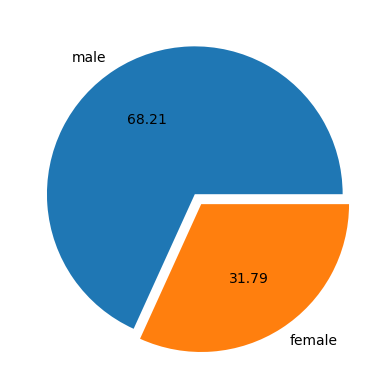

In [21]:
#2.d.Sex Composition.
plt.pie(df['sex'].value_counts(), labels = ['male', 'female'], autopct = '%.2f',
       explode = [0, 0.08])
plt.show()

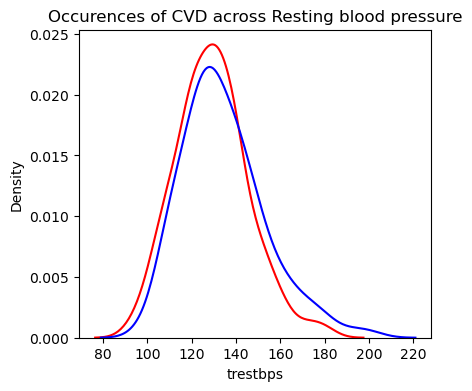

In [22]:
#2.e.
#Occurences of CVD across restblood pressure.
plt.figure(figsize = (10,4))
plt.subplot(121)
sns.kdeplot(data = df[df['target'] == 1]['trestbps'], color = 'red')
sns.kdeplot(data = df[df['target'] == 0]['trestbps'], color = 'blue')
plt.title('Occurences of CVD across Resting blood pressure')
plt.show()

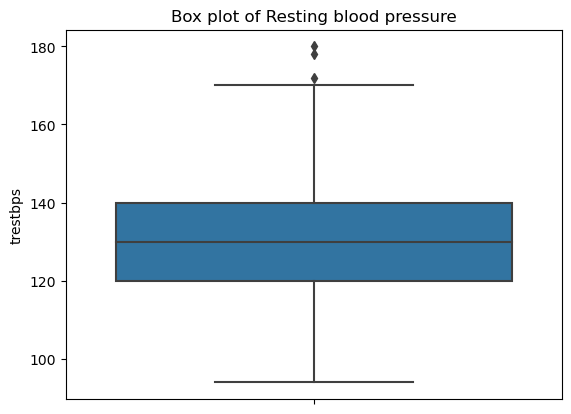

In [23]:
sns.boxplot(data = df[df['target'] == 1], y = 'trestbps')
plt.title('Box plot of Resting blood pressure')
plt.show()

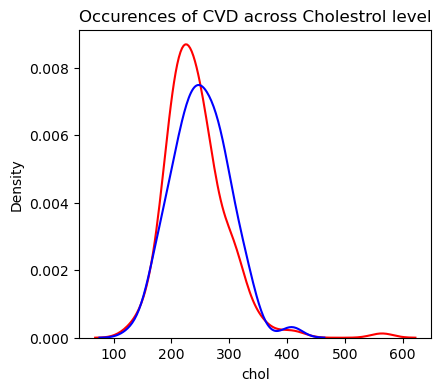

In [24]:
#2.f.
#Occurences of Cholestrol level.
plt.figure(figsize = (10,4))
plt.subplot(121)
sns.kdeplot(data = df[df['target'] == 1]['chol'], color = 'red')
sns.kdeplot(data = df[df['target'] == 0]['chol'], color = 'blue')
plt.title('Occurences of CVD across Cholestrol level')
plt.show()

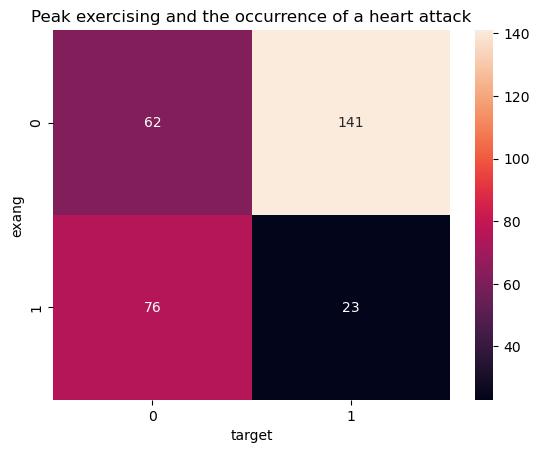

In [25]:
#2.g Relationship between peak exercising and the occurrence of a heart attack.
sns.heatmap(pd.crosstab(df['exang'], df['target']), annot = True, fmt = 'd')
plt.title('Peak exercising and the occurrence of a heart attack')
plt.show()

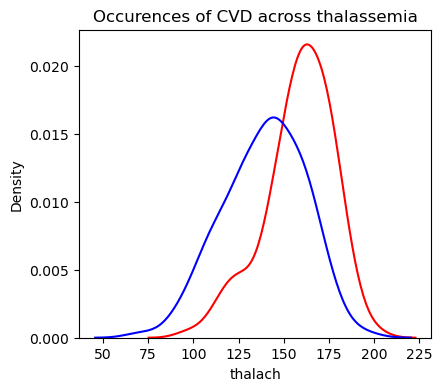

In [26]:
#2.h.
#Occurences of CVD with thalassemia.
plt.figure(figsize = (10,4))
plt.subplot(121)
sns.kdeplot(data = df[df['target'] == 1]['thalach'], color = 'red')
sns.kdeplot(data = df[df['target'] == 0]['thalach'], color = 'blue')
plt.title('Occurences of CVD across thalassemia')
plt.show()

In [27]:
#2.i.Other factors impacting the CVD
df.corr()['target']

age        -0.221476
sex        -0.283609
cp          0.432080
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalach     0.419955
exang      -0.435601
oldpeak    -0.429146
slope       0.343940
ca         -0.408992
thal       -0.343101
target      1.000000
Name: target, dtype: float64

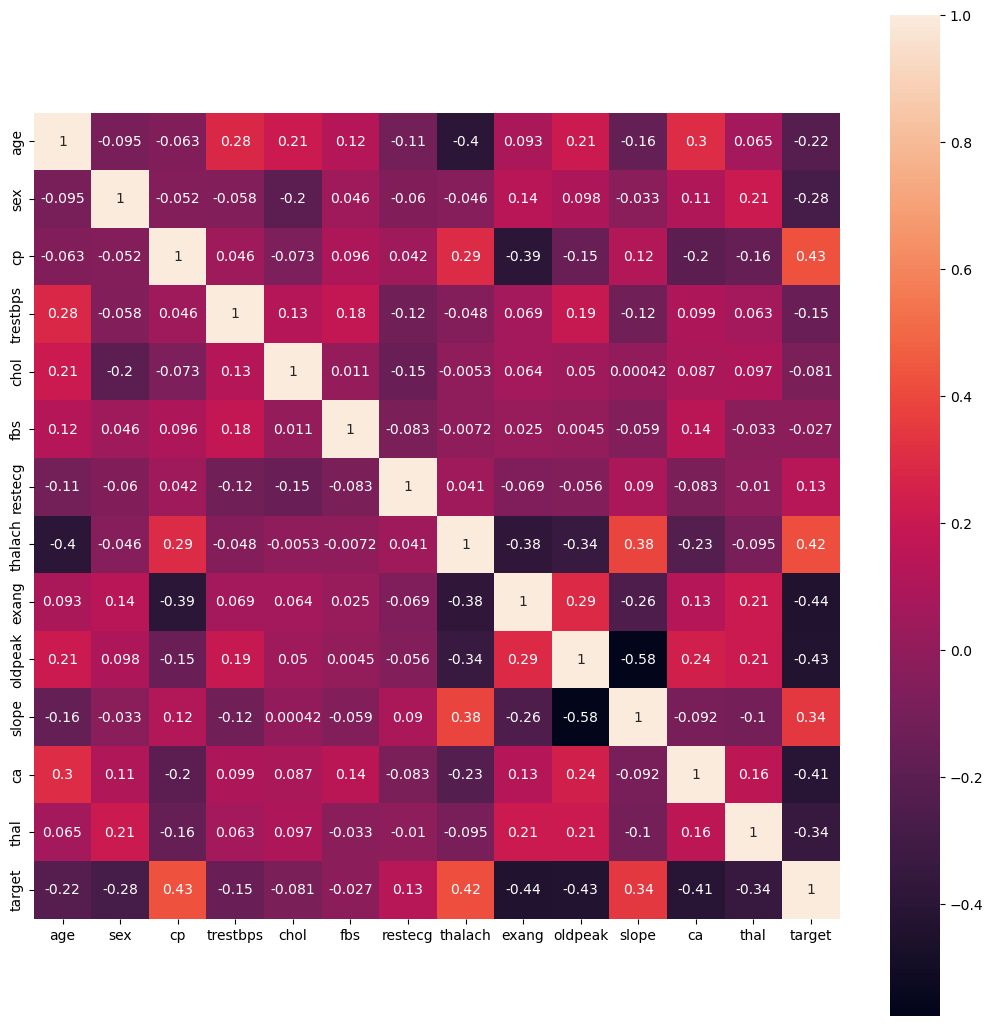

In [30]:
plt.figure(figsize = (13,13))
sns.heatmap(df.corr(), annot = True, square = True)
plt.show()

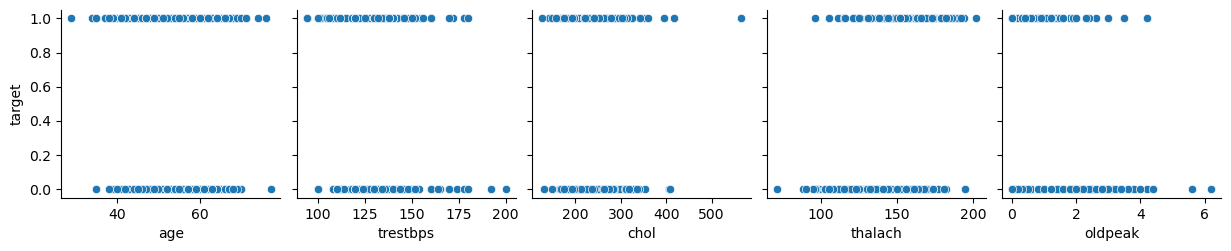

In [31]:
#2.j
col_continous = ['age','trestbps', 'chol', 'thalach', 'oldpeak']
sns.pairplot(df, x_vars = col_continous, y_vars = 'target')
plt.show()

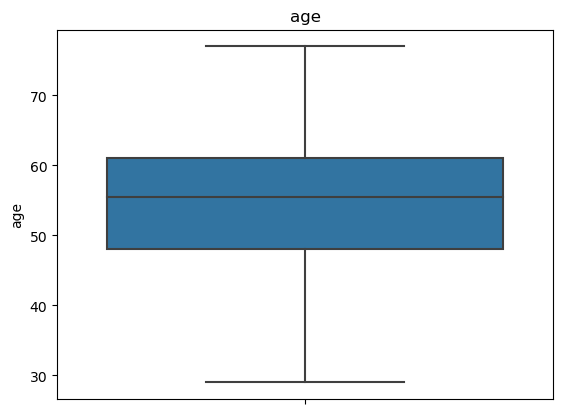

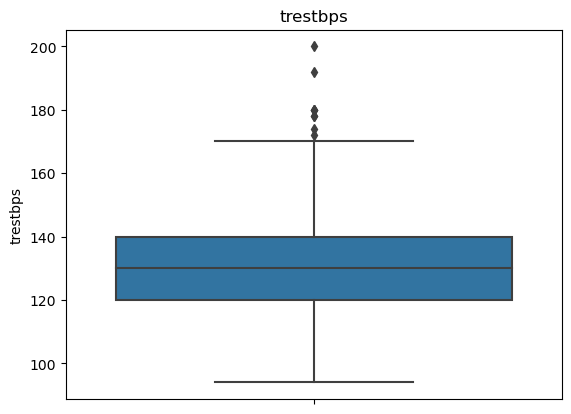

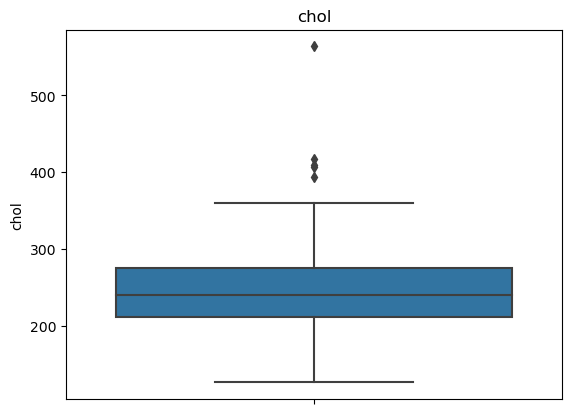

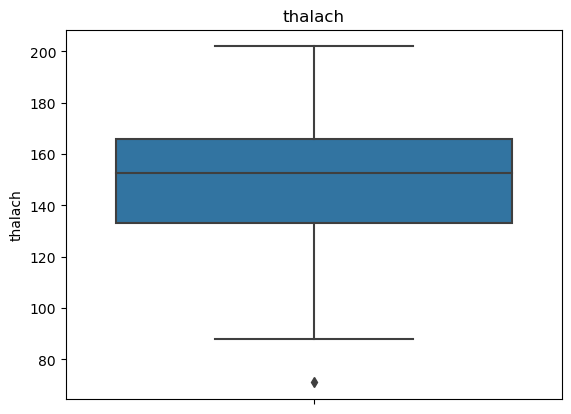

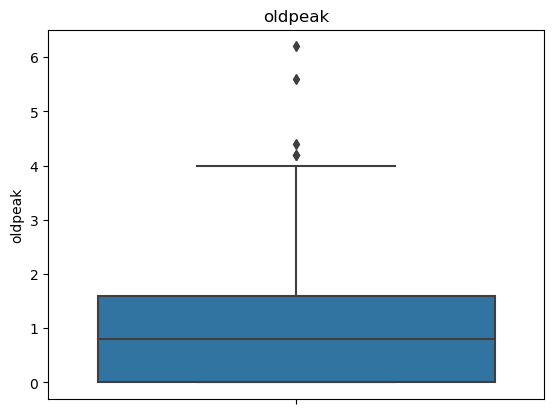

In [32]:
#Check Outliers in contionous column
for i in df[col_continous]:
    sns.boxplot(data = df, y = i)
    plt.title(i)
    plt.show()

**Capping the outlier in the continous column**

In [33]:
#Capping in trestbps column.
upper = df['trestbps'].mean() + (3 * df['trestbps'].std())
lower = df['trestbps'].mean() - (3 * df['trestbps'].std())
df['trestbps'] = np.where(df['trestbps'] > upper, upper,
                         np.where(df['trestbps'] < lower, lower, df['trestbps']))

In [34]:
#Capping in chol column.
upper = df['chol'].mean() + (3 * df['chol'].std())
lower = df['chol'].mean() - (3 * df['chol'].std())
df['chol'] = np.where(df['chol'] > upper, upper,
                         np.where(df['chol'] < lower, lower, df['chol']))

In [35]:
#Capping in thalach column.
upper = df['thalach'].mean() + (3 * df['thalach'].std())
lower = df['thalach'].mean() - (3 * df['thalach'].std())
df['chol'] = np.where(df['thalach'] > upper, upper,
                         np.where(df['thalach'] < lower, lower, df['thalach']))

In [36]:
#Capping in oldpeak column.
upper = df['oldpeak'].mean() + (3 * df['oldpeak'].std())
lower = df['oldpeak'].mean() - (3 * df['thalach'].std())
df['oldpeak'] = np.where(df['oldpeak'] > upper, upper,
                         np.where(df['oldpeak'] < lower, lower, df['oldpeak']))

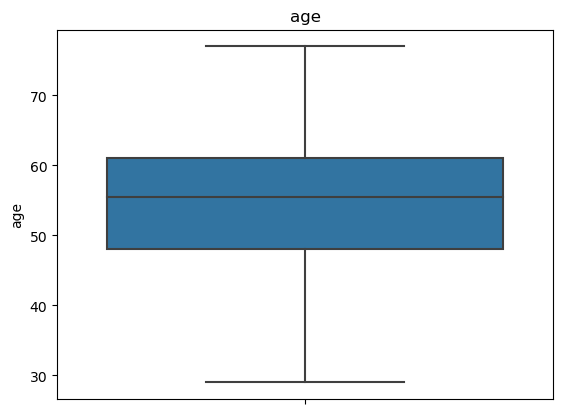

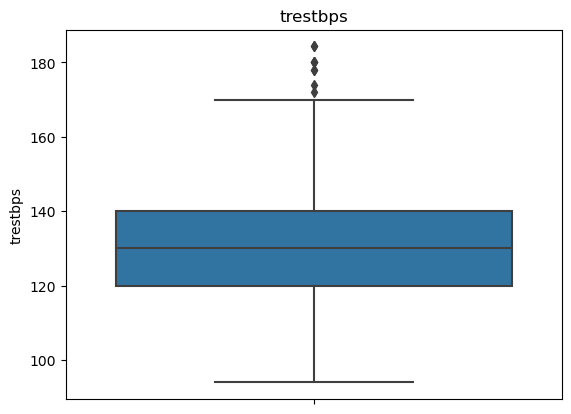

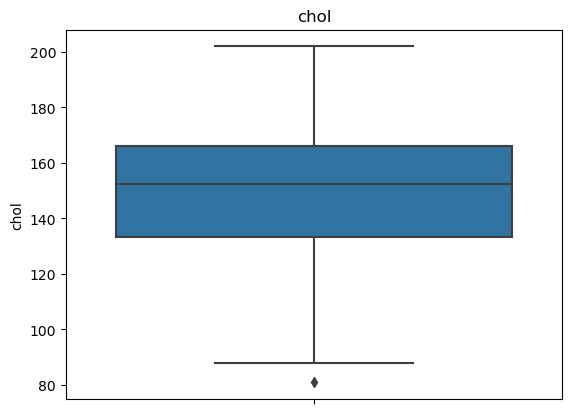

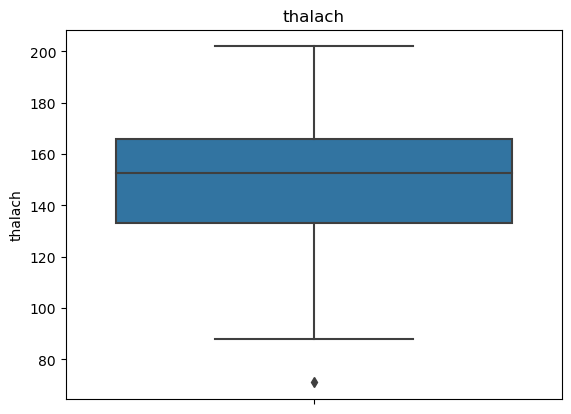

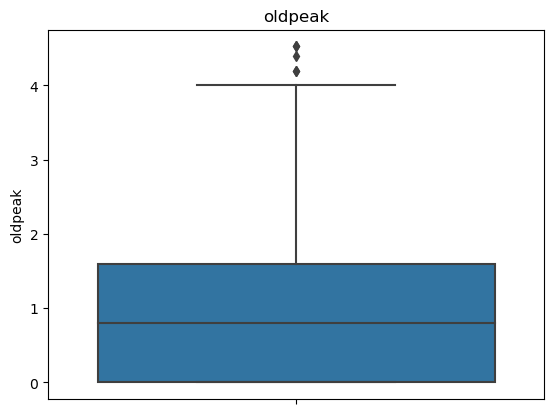

In [37]:
#Checking the distribution in continous column.
col_continous = ['age','trestbps', 'chol', 'thalach', 'oldpeak']
for i in df[col_continous]:
    sns.boxplot(data = df, y = i)
    plt.title(i)
    plt.show()

In [38]:
#Splitting the input and target variable.
x = df.drop(columns = 'target', axis = 1)
y = df['target']

In [39]:
#Splitting the data into training and testing set.
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 24)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((226, 13), (76, 13), (226,), (76,))

In [40]:
#Transforming the continous column and one hot encoding to categorical column.
tf = ColumnTransformer(transformers = [
    ('tf1', PowerTransformer(), ['age','trestbps', 'chol', 'thalach', 'oldpeak']),
    ('tf2', OneHotEncoder(sparse = False, dtype = 'int32', drop = 'first'),['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])],
    remainder = 'passthrough')

In [41]:
#Fitting the trandformer in training and testing data.
tf.fit(x_train)
x_train_transformed = tf.transform(x_train)
x_test_transformed = tf.transform(x_test)

**Logistic Regression Model**

In [42]:
model_1 = LogisticRegression()
model_1.fit(x_train_transformed,y_train)
y_pred = model_1.predict(x_test_transformed)
accuracy = accuracy_score(y_test,y_pred)
print(f"The accuracy of the model is {accuracy}.")
print(classification_report(y_test,y_pred))

The accuracy of the model is 0.8552631578947368.
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        37
           1       0.87      0.85      0.86        39

    accuracy                           0.86        76
   macro avg       0.86      0.86      0.86        76
weighted avg       0.86      0.86      0.86        76



In [43]:
tf.fit(x)
x_transformed = tf.transform(x)
accuracy_mean = cross_val_score(model_1, x, y, scoring = 'accuracy', cv = 5).mean()
print(f"The cross validation mean accuracy of the model is {accuracy_mean}.")

The cross validation mean accuracy of the model is 0.8342622950819673.


**Random forest Model**

In [44]:
model = RandomForestClassifier()
model.fit(x_train_transformed,y_train)
y_pred = model.predict(x_test_transformed)
accuracy = accuracy_score(y_test,y_pred)
print(f"The accuracy of the model is {accuracy}.")
print(classification_report(y_test,y_pred))

The accuracy of the model is 0.8157894736842105.
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        37
           1       0.82      0.82      0.82        39

    accuracy                           0.82        76
   macro avg       0.82      0.82      0.82        76
weighted avg       0.82      0.82      0.82        76



In [45]:
tf.fit(x)
x_transformed = tf.transform(x)
accuracy_mean = cross_val_score(model, x, y, scoring = 'accuracy', cv = 5).mean()
print(f"The cross validation mean accuracy of the model is {accuracy_mean}.")

The cross validation mean accuracy of the model is 0.8342622950819673.


In [46]:
import pickle
pickle.dump(model_1, open('model.pkl','wb'))